In [2]:
import sys
import os
sys.path.append('../utils_meinhold')
sys.path.append('../utils_zonca')
sys.path.append('../utils_zonca/pointing')
sys.path.append('../utils_zonca/demod')
sys.path.append('../')
sys.path.append('../telescope_control')
sys.path.append('../VtoT')
import convert
import realtime_gp as rt
import numpy as np
from datetime import datetime
import h5py

import warnings

import matplotlib.pyplot as plt
import time
#import planets
from datetime import timedelta
import cofe_util as cu

import Tkinter,tkFileDialog

from Tkinter import *
import ttk

import pickle
import glob

import cPickle

import utils

import datparsing

from scipy.optimize import curve_fit


from uncertainties import ufloat
from uncertainties.umath import *

%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


C:\Users\labuser\anaconda3\envs\py27\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['fmod', 'sinh', 'trunc', 'Text', 'tan', 'gamma', 'cosh', 'radians', 'sin', 'expm1', 'ldexp', 'Button', 'exp', 'datetime', 'frexp', 'ceil', 'copysign', 'Widget', 'degrees', 'cos', 'tanh', 'fabs', 'sqrt', 'hypot', 'log', 'log10', 'log1p', 'floor', 'modf', 'isinf', 'isnan']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [17]:
%matplotlib inline

In [4]:
def get_file_times(fld, offset):
    startfile = fld[0][:43] + fld[0][49:-2] + 'dat'
    endfile = fld[-1][:43] + fld[-1][49:-2] + 'dat'

    # starttime = os.path.getctime(startfile)
    starttime = os.stat(startfile).st_mtime + offset * 3600
    starttime = datetime.datetime.fromtimestamp(starttime)

    # endtime = os.path.getctime(endfile)
    endtime = os.stat(endfile).st_mtime + offset * 3600
    endtime = datetime.datetime.fromtimestamp(endtime)

    return starttime, endtime

In [5]:
def vary_phase(chan,file_list):
#loop over a full range of phase offsets to determine maximum polarization (Q) signal
#For horn 2 us ch4 =H2 Hi AC. We find maximum Q signal, even though test had maximum negative Q
#because the Temperature calibration will change the sign of the data
    qvsphase={}
    phases=[]
    qmeans=[]
    umeans=[]
    figure()
    for phase_offset in arange(0,65):    
        print(phase_offset)
        phases.append(phase_offset)
        j=rt.get_demodulated_data_from_list(filelist=file_list,phase_offset=phase_offset)
        qmeans.append(np.max(j[chan]['Q']))
        umeans.append(np.max(j[chan]['U']))
        plot(j[chan]['Q'],label='Q '+ str(phase_offset))
    legend()
    title('Q,U vs phase offset for ' + rt.chantoname(chan))
    qvsphase['phases']=phases
    qvsphase['qmeans']=qmeans
    qvsphase['umeans']=umeans
    figure()
    plot(qvsphase['phases'],qvsphase['qmeans'],label='Q ' + rt.chantoname(chan))
    plot(qvsphase['phases'],qvsphase['umeans'],label='U ' + rt.chantoname(chan))
    title('Q,U (volts) vs phase for -Q signal')
    xlabel('Phase offset, [encoder counts]')
    ylabel('Q (U) [Volts]')
    legend()
    grid()
    return qvsphase

In [6]:
dd={}

In [7]:
#dfile = ['D:/software_git_repos/polaris/polaris_data/data/20201028/09525700.dat']

In [8]:
dfile = ['D:/software_git_repos/polaris/polaris_data/data/20180205/14322500.dat']

In [9]:
raw_data = rt.demod.open_raw(dfile[0])
#raw_data2 = rt.demod.open_raw(dfile2[0])

In [12]:
#plt.figure()
#plt.plot(raw_data)

In [13]:
enc = raw_data['enc'][:30000]
enc = np.mod(enc+6,4096)

data = utils.adu2volts(raw_data[rt.nametochan('H3HiAC')])[:30000]

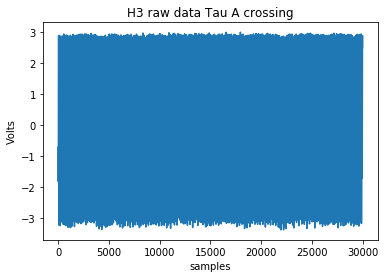

In [18]:
plt.figure()
plt.plot(data)
plt.xlabel('samples')
plt.ylabel('Volts')
plt.title('H3 raw data Tau A crossing')
plt.show()

In [19]:
isort = np.argsort(enc)
ienc = enc[isort]*1
idata = data[isort]*1

Text(0.5,1,'H3 raw data Tau A crossing')

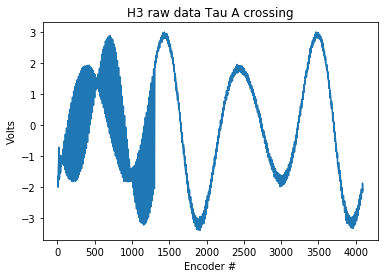

In [20]:
plt.figure()
plt.plot(ienc, idata)
plt.xlabel('Encoder #')
plt.ylabel('Volts')
plt.title('H3 raw data Tau A crossing')

0


1001
16
1


1001
16
2


1001
16
3


1001
16
4


1001
16
5


1001
16
6


1001
16
7


1001
16
8


1001
16
9


1001
16
10


1001
16
11


1001
16
12


1001
16
13


1001
16
14


1001
16
15


1001
16
16


1001
16
17


1001
16
18


1001
16
19


1001
16
20


1001
16
21


1001
16
22


1001
16
23


1001
16
24


1001
16
25


1001
16
26


1001
16
27


1001
16
28


1001
16
29


1001
16
30


1001
16
31


1001
16
32


1001
16
33


1001
16
34


1001
16
35


1001
16
36


1001
16
37


1001
16
38


1001
16
39


1001
16
40


1001
16
41


1001
16
42


1001
16
43


1001
16
44


1001
16
45


1001
16
46


1001
16
47


1001
16
48


1001
16
49


1001
16
50


1001
16
51


1001
16
52


1001
16
53


1001
16
54


1001
16
55


1001
16
56


1001
16
57


1001
16
58


1001
16
59


1001
16
60


1001
16
61


1001
16
62


1001
16
63


1001
16
64


1001
16


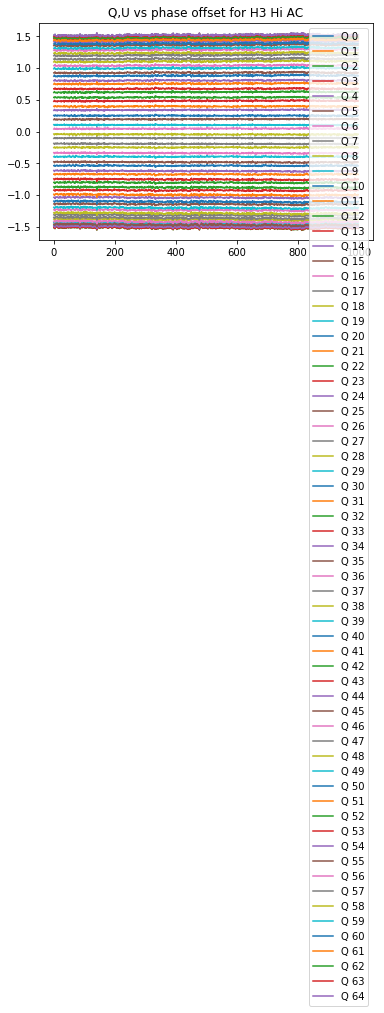

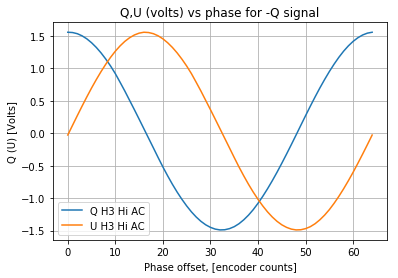

In [21]:
qvsphase_h3=vary_phase(chan='ch8',file_list=dfile)

In [22]:
phase = np.array(qvsphase_h3['phases'])
qmean = np.array(qvsphase_h3['qmeans'])
umean = np.array(qvsphase_h3['umeans'])

In [23]:
chan = 'ch8'

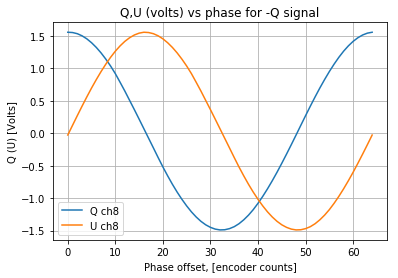

In [24]:
plt.figure()
plt.plot(phase,qmean,label='Q ' + (chan))
plt.plot(phase,umean,label='U ' + (chan))
plt.title('Q,U (volts) vs phase for -Q signal')
plt.xlabel('Phase offset, [encoder counts]')
plt.ylabel('Q (U) [Volts]')
plt.legend()
plt.grid()

In [25]:
imax = phase[qmean == qmean.max()][0]
imin = phase[qmean == qmean.min()]

iumax = phase[umean == umean.max()]
iumin = phase[umean == umean.min()]

In [27]:
ddmax = rt.get_demodulated_data_from_list(filelist=dfile, phase_offset=imax)
ddmin = rt.get_demodulated_data_from_list(filelist=dfile, phase_offset=imin)

dd = rt.get_demodulated_data_from_list(filelist=dfile,phase_offset=0)


1001
16


1001
16


1001
16


In [28]:
Tbase = dd['ch8']['T'][277:].mean()
Qbase = ddmax['ch8']['Q'][277:].mean()
Ubase = ddmax['ch8']['U'][277:].mean()

Tbaseerr = dd['ch8']['T'][277:].std()
Qbaseerr = ddmax['ch8']['Q'][277:].std()
Ubaseerr = ddmax['ch8']['U'][277:].std()

Tbase = ufloat(Tbase, Tbaseerr)
Qbase = ufloat(Qbase, Qbaseerr)
Ubase = ufloat(Ubase, Ubaseerr)

Tmin = dd['ch8']['T'].min()
Qmin = ddmax['ch8']['Q'].min()
Umax = ddmax['ch8']['U'].max()

Tsignal = (Tbase - Tmin)*1e3
Qsignal = (Qbase - Qmin)*1e3
Usignal = (Umax - Ubase)*1e3

#Tsignalerr = Tbaseerr*1e3
#Qsignalerr = Qbaseerr*1e3
#Usignalerr = Ubaseerr*1e3

Psignal = (Qsignal**2 + Usignal**2)**(0.5)

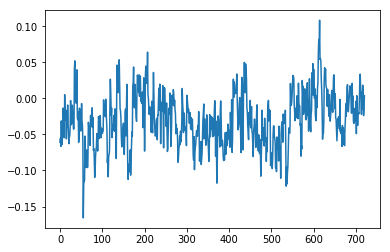

In [29]:
plt.figure()
plt.plot(dd['ch8']['T'][277:])

In [30]:
iQmin = np.where(ddmax['ch8']['Q'] == ddmax['ch8']['Q'].min())
IUmax = np.where(ddmax['ch8']['U'] == ddmax['ch8']['U'].min())

Qbase = ddmax['ch8']['Q'][277:].mean()
Ubase = ddmax['ch8']['U'][277:].mean()

In [31]:
Q_max = []
U_max = []

Q_signal_max = []
U_signal_max = []

for p in phase:
    data_max = rt.get_demodulated_data_from_list(filelist=dfile, phase_offset=p)
    
    Qm = data_max['ch8']['Q'][iQmin]
    Um = data_max['ch8']['U'][iQmin]
    
    Q_base = data_max['ch8']['Q'][277:].mean()
    U_base = data_max['ch8']['U'][277:].mean()
    
    Q_signal = (Q_base - Qm)
    U_signal = (U_base - Um)
    
    Q_max.append(Qm)
    U_max.append(Um)
    
    Q_signal_max.append(Q_signal)
    U_signal_max.append(U_signal)

Q_max = np.array(Q_max)
U_max = np.array(U_max)

Q_signal_max = np.array(Q_signal_max)
U_signal_max = np.array(U_signal_max)

1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


1001
16


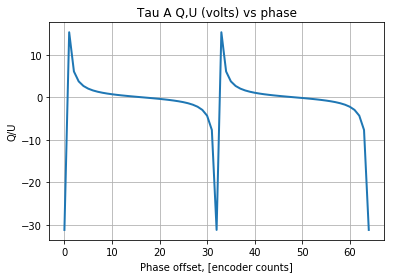

In [32]:
plt.figure()
plt.plot(phase, Q_max/U_max, linewidth=2, label='Q/U')
#plt.plot(phase, U_max, linewidth=2, label='U')
plt.title('Tau A Q,U (volts) vs phase')
plt.xlabel('Phase offset, [encoder counts]')
plt.ylabel('Q/U')
#plt.legend()
plt.grid()

In [33]:
P_max = np.sqrt(Q_max**2 + U_max**2)

In [34]:
print (P_max.max()-P_max.min())/P_max.mean()

0.00178873221955965


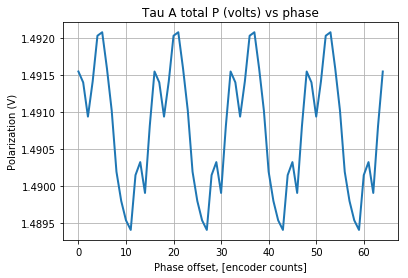

In [35]:
plt.figure()
plt.plot(phase, P_max, linewidth=2, label='Q/U')
#plt.plot(phase, U_max, linewidth=2, label='U')
plt.title('Tau A total P (volts) vs phase')
plt.xlabel('Phase offset, [encoder counts]')
plt.ylabel('Polarization (V)')
#plt.legend()
plt.grid()

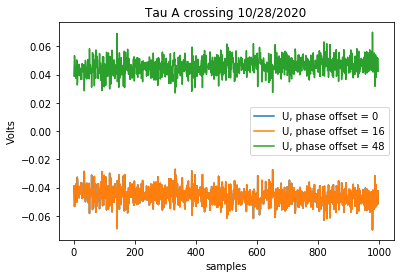

In [36]:
plt.figure()
var1 = 'T'
var2 = 'Q'
var3 = 'U'
#plt.plot(dd['ch8'][var1], label=' %s, phase offset = 0' % var1)
#plt.plot(dd['ch8'][var2], label='%s, phase offset = 0' % var2)
plt.plot(dd['ch8'][var3], label='%s, phase offset = 0' % var3)
#plt.plot(ddmax['ch8'][var1], label=' %s, phase offset = %d' % (var1, imax))
#plt.plot(ddmax['ch8'][var2], label='%s, phase offset = %d' % (var2, imax))
#plt.plot(ddmax['ch8'][var1], label=' %s, phase offset = %d' % (var1, imax))
#plt.plot(ddmin['ch8'][var2], label='%s, phase offset = %d' % (var2, imin))
plt.plot(ddmax['ch8'][var3], label='%s, phase offset = %d' % (var3, iumax))
plt.plot(ddmin['ch8'][var3], label='%s, phase offset = %d' % (var3, iumin))
plt.xlabel('samples')
plt.ylabel('Volts')
plt.title('Tau A crossing 10/28/2020')
plt.legend()

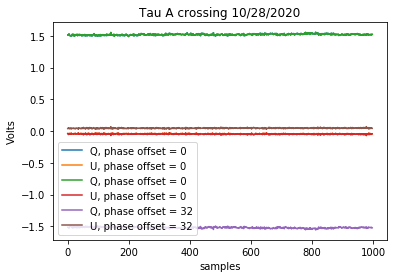

In [37]:
plt.figure()
var1 = 'T'
var2 = 'Q'
var3 = 'U'
#plt.plot(dd['ch8'][var1], label=' %s, phase offset = 0' % var1)
plt.plot(dd['ch8'][var2], label='%s, phase offset = 0' % var2)
plt.plot(dd['ch8'][var3], label='%s, phase offset = 0' % var3)
#plt.plot(ddmax['ch8'][var1], label=' %s, phase offset = %d' % (var1, imax))
plt.plot(ddmax['ch8'][var2], label='%s, phase offset = %d' % (var2, imax))
#plt.plot(ddmax['ch8'][var1], label=' %s, phase offset = %d' % (var1, imax))
plt.plot(ddmax['ch8'][var3], label='%s, phase offset = %d' % (var3, imax))
plt.plot(ddmin['ch8'][var2], label='%s, phase offset = %d' % (var2, imin))
plt.plot(ddmin['ch8'][var3], label='%s, phase offset = %d' % (var3, imin))
plt.xlabel('samples')
plt.ylabel('Volts')
plt.title('Tau A crossing 10/28/2020')
plt.legend()

In [41]:
c = 3e8 # m/s
k = 1.38e-23 # J/K
Ta = 1e-3# mK
h = 6.63e-34 # J*s
FtoJ = 1e26 #flux to jansky conversion

In [42]:
#using slope of line in WMAP paper: https://arxiv.org/pdf/astro-ph/0603450.pdf,  to get flux of tau A at 10 GHz
'''
#use for Tcrab
y1 = 352/FtoJ
y1err = 11/FtoJ
x1 = 22.5e9

y2 = 229/FtoJ
y2err = 11/FtoJ
x2 = 92.9e9

m = np.log10(y2/y1)/np.log10(x2/x1)
b = np.log10(y1) - m*np.log10(x1)

L = np.log10(x2/x1)

merr = np.sqrt((y2err/L/np.log(10)/y2)**2 + (y1err/L/np.log(10)/y1)**2)
berr = np.sqrt((y1err/y1/np.log(10))**2 + (merr*np.log(x1))**2)
'''

#use for Q/Ucrab
y1 = 352/FtoJ
y1err = 11/FtoJ
x1 = 22.5e9

y2 = 229/FtoJ
y2err = 11/FtoJ
x2 = 92.9e9

m = np.log10(y2/y1)/np.log10(x2/x1)
b = np.log10(y1) - m*np.log10(x1)

L = np.log10(x2/x1)

merr = np.sqrt((y2err/L/np.log(10)/y2)**2 + (y1err/L/np.log(10)/y1)**2)
berr = np.sqrt((y1err/y1/np.log(10))**2 + (merr*np.log(x1))**2)
#m = ufloat(m, merr)
#b = ufloat(b, berr)

In [43]:
print(m,b)

(-0.30317816965153227, -20.314901588782277)


In [44]:
def Flux(nu):
    nu = nu*1e9
    return (10**b * nu**m)*FtoJ

In [45]:
Fcrab = Flux(10.)
print Fcrab , ' Jy'
Fcrab = ufloat(Fcrab, 11.)

450.1079821292317  Jy


In [46]:
#polaris numbers
nu = 10e9 # Ghz
l = c/nu # m

fwhm = ufloat(1.31, 0.024) # degrees

In [47]:
#solid angle in sterradians
SA = (fwhm**2)*(np.pi/4/np.log(2)/3282.8)
Ae = l**2 / SA
F = k*Ta/Ae
KtoJ = F*FtoJ
JtoK = 1/KtoJ
Tcrab = Fcrab*JtoK
print JtoK
print JtoK*2
print 'Tcrab: %s mK' % Tcrab

1.10+/-0.04
2.20+/-0.08
Tcrab: 496+/-22 mK


In [48]:
Qcrab = ufloat(33,12)
Tcrab = ufloat(496,22)
Ucrab = ufloat(5,12)

In [49]:
Q = 33
Qerr = 12
U = 5
Uerr = 12
P = np.sqrt(Q**2 + U**2)
Perr = np.sqrt((Q*Qerr)**2 + (U*Uerr)**2)/P

In [50]:
print P, Perr
print P/Tcrab

33.37663853655727 12.0
0.0673+/-0.0030


In [51]:
gain = 1.21
gainerr = 0.25
gain = ufloat(gain, gainerr)

#Ierr = np.sqrt((Tsignal*gainerr)**2 +  (gain*Tsignalerr)**2)
#Qerr = np.sqrt((Qsignal*gainerr)**2 +  (gain*Qsignalerr)**2)
#Uerr = np.sqrt((Usignal*gainerr)**2 +  (gain*Usignalerr)**2)

#Perr = np.sqrt((Qsignal*Qerr)**2 + (Usignal*Uerr)**2)/Psignal

#PoverIerr = np.sqrt((Perr/Tsignal)**2 + (Psignal*Ierr/Tsignal**4))
#print PoverIerr
#print Qsignal/Tsignal

In [52]:
T =  gain*(670/1.24)
Q =  gain*(46/1.24)
U =  gain*(26/1.24)
print T
print Q
print U
P = np.sqrt(45**2 + 25**2)
Perr = np.sqrt(45**2 * 9**2 + 25**2 * 5**2)/P
P = ufloat(P, Perr)
print P
print 100*P/T

(6.5+/-1.4)e+02
45+/-9
25+/-5
51+/-8
7.9+/-2.1


In [53]:
print ufloat(1.3, 0.1)*np.pi/2
print ufloat(1.11,0.23)*np.pi/2

2.04+/-0.16
1.7+/-0.4


In [54]:
x1 = 8
s1 = 2
x2 = 7
s2 = 0

z = abs(x1-x2)/np.sqrt(s1**2 + s2**2)
print z

0.5


In [55]:
tau = 0.0103608
#tau = ln(incident/transmitted)
#e^tau = incident/transmitted
#incident = transmitted*e^tau

print Tsignal*gain
print Tsignal*gain*np.exp(tau)
print np.exp(tau)

(1.6+/-0.6)e+02
(1.7+/-0.6)e+02
1.010414658934828


In [56]:
print Usignal*gain

23+/-8


In [57]:
print 'measured I = %s mK' % (Tsignal*gain)
print 'expected I = %s mK' % (Tcrab)
#print '%% difference: %s' % (100*abs(Tcrab - Tsignal*gain)/Tcrab)
print '------------------------'
print 'measured gain: %s K/V' % (gain)
print 'expected gain: %s K/V' % (Tcrab/Tsignal)
#print '%% difference: %s' % (100*abs(Tcrab/Tsignal - 1.24)/(Tcrab/Tsignal))
print '------------------------'
print 'measured I = %s mK' % (Tsignal*gain)
print 'measured Q = %s mK' % (Qsignal*gain)
print 'measured U = %s mK' % (Usignal*gain)
print 'measured P = %s mK' % (Psignal*gain)
print 'expected P = %s mK' % (0.07*Tcrab)
#print '%% difference: %.2f' % (100*abs(Psignal - 0.7*Psignal)/(0.7*Psignal))
print '------------------------'
print 'measured polarization fraction: %s%%' % (100*Psignal/Tsignal)
print 'expected polarization fraction: ~%s%%' % (7)
#print '%% difference: %.2f' % (100*(7 - 100*Psignal/Tsignal)/7)
print '------------------------'
print 'measured P/I (U~0): %s %%' % (100*Qsignal/Tsignal)
print 'expected P/I(U~0): ~%s%%' % (7)
#print '%% difference(U~0): %s' % (100*abs(7 - 100*Qsignal/Tsignal)/7)
print '------------------------'

measured I = (1.6+/-0.6)e+02 mK
expected I = 496+/-22 mK
------------------------
measured gain: 1.21+/-0.25 K/V
expected gain: 3.6+/-1.0 K/V
------------------------
measured I = (1.6+/-0.6)e+02 mK
measured Q = 41+/-15 mK
measured U = 23+/-8 mK
measured P = 48+/-15 mK
expected P = 34.7+/-1.5 mK
------------------------
measured polarization fraction: 29+/-10%
expected polarization fraction: ~7%
------------------------
measured P/I (U~0): 25+/-10 %
expected P/I(U~0): ~7%
------------------------
